# Analysis of scaling execution times

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
mpi_strong_times = pd.read_csv('mpi_strong_scaling.csv')
mpi_weak_times = pd.read_csv('mpi_weak_scaling.csv')
omp_strong_times = pd.read_csv('omp_strong_scaling.csv')
omp_weak_times = pd.read_csv('omp_weak_scaling.csv')

## MPI Strong Scaling

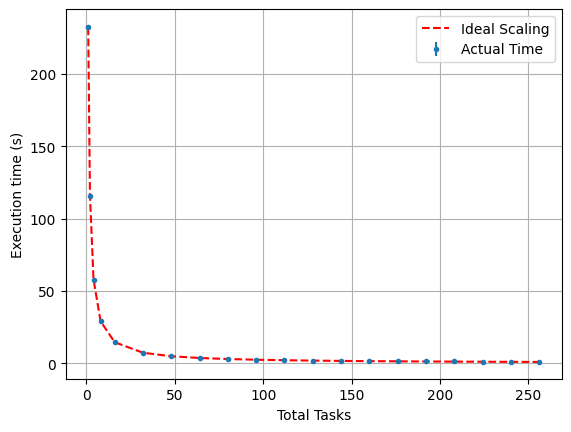

In [3]:
mpi_strong_mean_times = mpi_strong_times.groupby('Total Tasks').mean()
mpi_strong_std_times = mpi_strong_times.groupby('Total Tasks').std()

serial_time = mpi_strong_mean_times['Elapsed Time(s)'].iloc[0]
ideal_time = serial_time / mpi_strong_mean_times.index

plt.errorbar(mpi_strong_mean_times.index, mpi_strong_mean_times['Elapsed Time(s)'], yerr=mpi_strong_std_times['Elapsed Time(s)'], fmt='o', markersize=3, label='Actual Time')
plt.plot(mpi_strong_mean_times.index, ideal_time, '--', color='r', label='Ideal Scaling')

plt.xlabel('Total Tasks')
plt.ylabel('Execution time (s)')
plt.grid()
plt.legend()
plt.savefig('figures/mpi_strong_scaling.png')
plt.show()

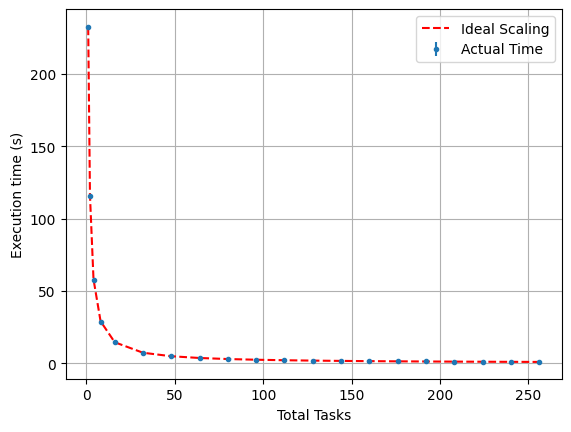

In [4]:
mpi_strong_mean_times = mpi_strong_times.groupby('Total Tasks').mean()
mpi_strong_std_times = mpi_strong_times.groupby('Total Tasks').std()

serial_time = mpi_strong_mean_times['Computation Time(s)'].iloc[0]
ideal_time = serial_time / mpi_strong_mean_times.index

plt.errorbar(mpi_strong_mean_times.index, mpi_strong_mean_times['Computation Time(s)'], yerr=mpi_strong_std_times['Elapsed Time(s)'], fmt='o', markersize=3, label='Actual Time')
plt.plot(mpi_strong_mean_times.index, ideal_time, '--', color='r', label='Ideal Scaling')

plt.xlabel('Total Tasks')
plt.ylabel('Execution time (s)')

plt.grid()
plt.legend()
plt.savefig('figures/mpi_strong_scaling_computation.png')
plt.show()

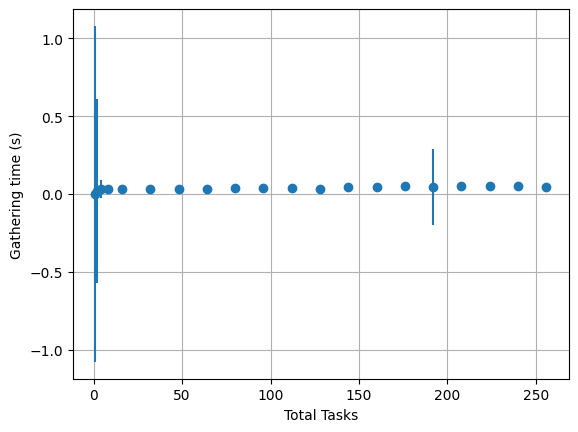

In [5]:
mpi_strong_mean_times = mpi_strong_times.groupby('Total Tasks').mean()
mpi_strong_std_times = mpi_strong_times.groupby('Total Tasks').std()

plt.errorbar(mpi_strong_mean_times.index, mpi_strong_mean_times['Gathering Time(s)'], yerr=mpi_strong_std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Total Tasks')
plt.ylabel('Gathering time (s)')
plt.grid()
plt.savefig('figures/mpi_strong_scaling_gathering.png')
plt.show()

## Speedup and Efficiency of MPI Strong Scaling

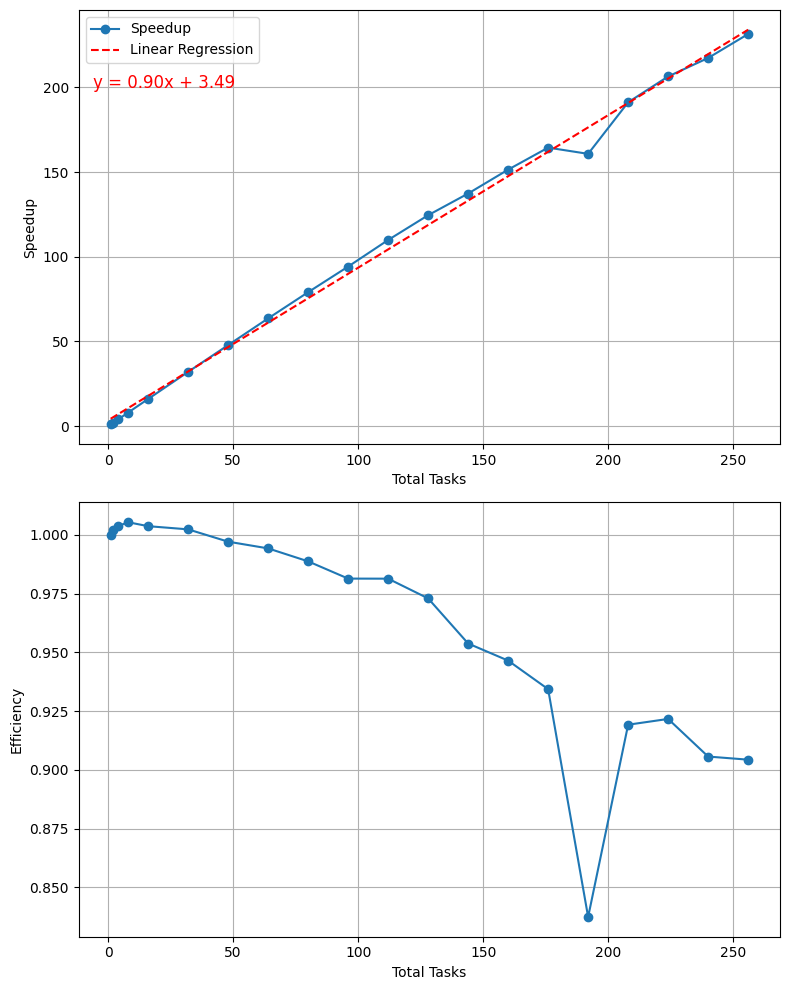

In [6]:
mpi_strong_serial_time = mpi_strong_mean_times['Elapsed Time(s)'].iloc[0]

fig, ax1 = plt.subplots(2, 1, figsize=(8, 10))

mpi_strong_speedup = mpi_strong_serial_time / mpi_strong_mean_times['Elapsed Time(s)']
ax1[0].plot(mpi_strong_mean_times.index, mpi_strong_speedup, '-o', label='Speedup')
ax1[0].set_xlabel('Total Tasks')
ax1[0].set_ylabel('Speedup')
ax1[0].grid()


x = mpi_strong_mean_times.index#[:11]
y = mpi_strong_speedup#[:11]
coefficients = np.polyfit(x, y, 1)
linear_model = np.poly1d(coefficients)


ax1[0].plot(x, linear_model(x), 'r--', label='Linear Regression')
slope, intercept = coefficients
ax1[0].text(0.02, 0.82, f'y = {slope:.2f}x + {intercept:.2f}', transform=ax1[0].transAxes, color='red', fontsize=12)

ax1[0].legend()
plt.tight_layout()

ax1[1].plot(mpi_strong_mean_times.index, mpi_strong_speedup /  mpi_strong_mean_times.index, '-o', label='Efficiency')
ax1[1].set_xlabel('Total Tasks')
ax1[1].set_ylabel('Efficiency')
ax1[1].grid()

plt.tight_layout()
plt.savefig('figures/mpi_strong_scaling_speedup_efficiency.png')
plt.show()

In [7]:
print(mpi_strong_mean_times)
print(mpi_strong_speedup)

             Iteration  Elapsed Time(s)  Computation Time(s)  \
Total Tasks                                                    
1                  2.0       231.992764           231.992706   
2                  2.0       115.753435           115.731981   
4                  2.0        57.777384            57.746117   
8                  2.0        28.842595            28.810425   
16                 2.0        14.445374            14.413812   
32                 2.0         7.232464             7.202133   
48                 2.0         4.847008             4.816159   
64                 2.0         3.645716             3.609892   
80                 2.0         2.932847             2.895791   
96                 2.0         2.462315             2.423784   
112                2.0         2.110626             2.072529   
128                2.0         1.862743             1.827508   
144                2.0         1.689113             1.642842   
160                2.0         1.531889 

## MPI Weak Scaling

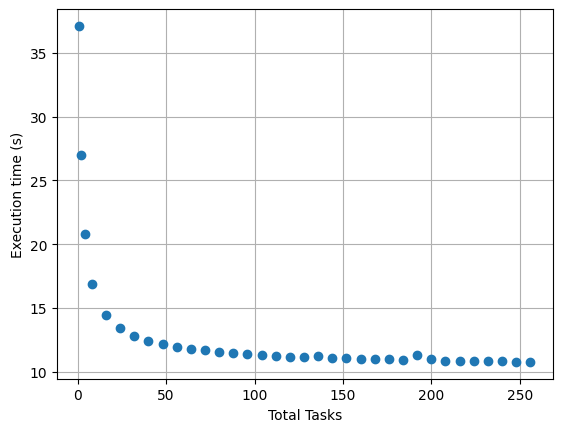

In [8]:
mpi_weak_mean_times = mpi_weak_times.groupby('Total Tasks').mean()
mpi_weak_std_times = mpi_weak_mean_times.groupby('Total Tasks').std()

plt.errorbar(mpi_weak_mean_times.index, mpi_weak_mean_times['Elapsed Time(s)'], yerr=mpi_weak_std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Total Tasks')
plt.ylabel('Execution time (s)')
plt.grid()
plt.savefig('figures/mpi_weak_scaling.png')
plt.show()

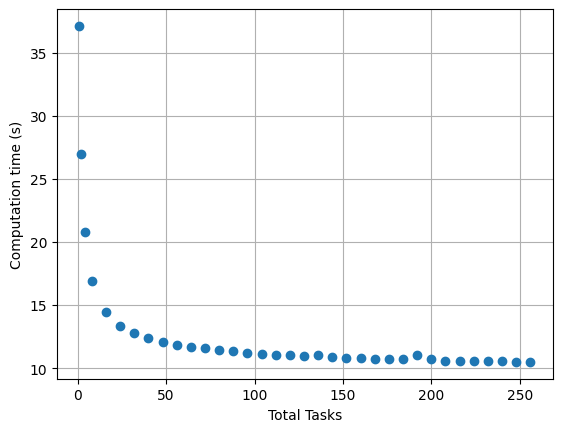

In [9]:
mpi_weak_mean_times = mpi_weak_times.groupby('Total Tasks').mean()
mpi_weak_std_times = mpi_weak_mean_times.groupby('Total Tasks').std()

plt.errorbar(mpi_weak_mean_times.index, mpi_weak_mean_times['Computation Time(s)'], yerr=mpi_weak_std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Total Tasks')
plt.ylabel('Computation time (s)')
plt.grid()
plt.savefig('figures/mpi_weak_scaling_computation.png')
plt.show()

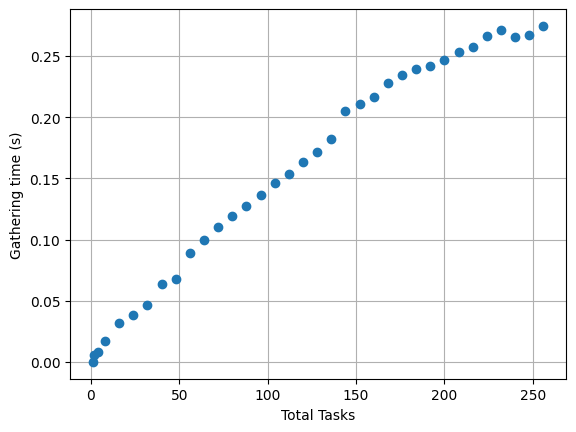

In [10]:
mpi_weak_mean_times = mpi_weak_times.groupby('Total Tasks').mean()
mpi_weak_std_times = mpi_weak_mean_times.groupby('Total Tasks').std()

plt.errorbar(mpi_weak_mean_times.index, mpi_weak_mean_times['Gathering Time(s)'], yerr=mpi_weak_std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Total Tasks')
plt.ylabel('Gathering time (s)')
plt.savefig('figures/mpi_weak_scaling_gathering.png')
plt.grid()
plt.show()

## Speedup and Efficiency of MPI Weak Scaling

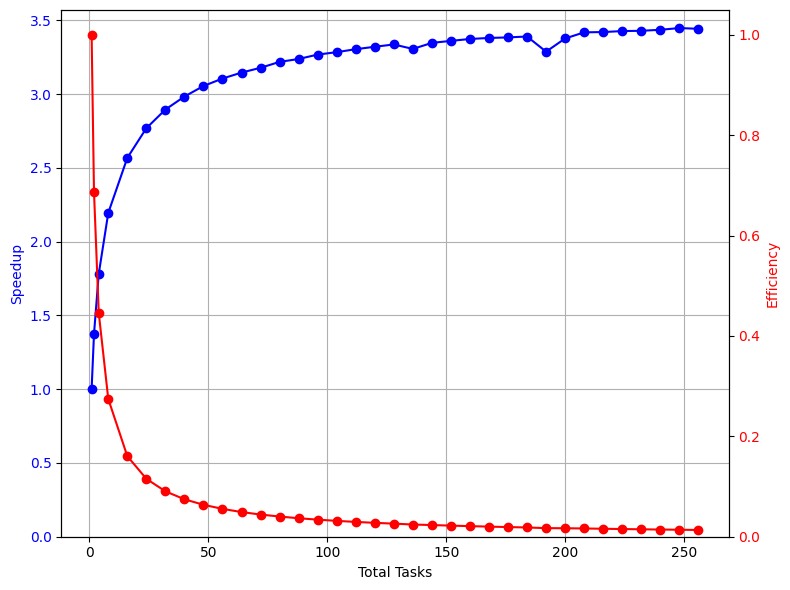

In [11]:
mpi_weak_serial_time = mpi_weak_mean_times['Elapsed Time(s)'].iloc[0]

fig, ax1 = plt.subplots(figsize=(8, 6))

speedup = mpi_weak_serial_time / mpi_weak_mean_times['Elapsed Time(s)']
ax1.plot(mpi_weak_mean_times.index, speedup, '-o', color='b', label='Speedup')
ax1.set_xlabel('Total Tasks')
ax1.set_ylabel('Speedup', color='b')
ax1.grid()
ax1.set_ylim(0, None)
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
efficiency = speedup / mpi_weak_mean_times.index
ax2.plot(mpi_weak_mean_times.index, efficiency, '-o', color='r', label='Efficiency')
ax2.set_ylabel('Efficiency', color='r')
ax2.set_ylim(0, None)
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.savefig('figures/mpi_weak_scaling_speedup_efficiency.png')
plt.show()

## OpenMP Strong Scaling

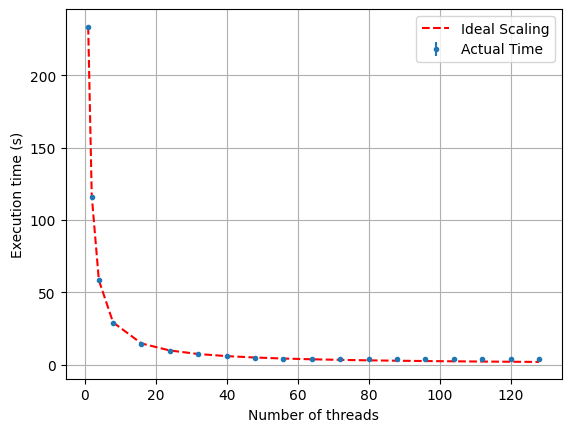

In [12]:
omp_strong_mean_times = omp_strong_times.groupby('Threads').mean()
omp_strong_std_times = omp_strong_times.groupby('Threads').std()
serial_time = omp_strong_mean_times['Elapsed Time(s)'].iloc[0]
ideal_time = serial_time / omp_strong_mean_times.index

plt.errorbar(omp_strong_mean_times.index, omp_strong_mean_times['Elapsed Time(s)'], yerr=omp_strong_std_times['Elapsed Time(s)'], fmt='o', markersize=3, label='Actual Time')
plt.plot(omp_strong_mean_times.index, ideal_time, '--', color='r', label='Ideal Scaling')
plt.xlabel('Number of threads')
plt.ylabel('Execution time (s)')
plt.grid()
plt.legend()
plt.savefig('figures/omp_strong_scaling.png')
plt.show()

## Speedup and Efficiency of OpenMP Strong Scaling

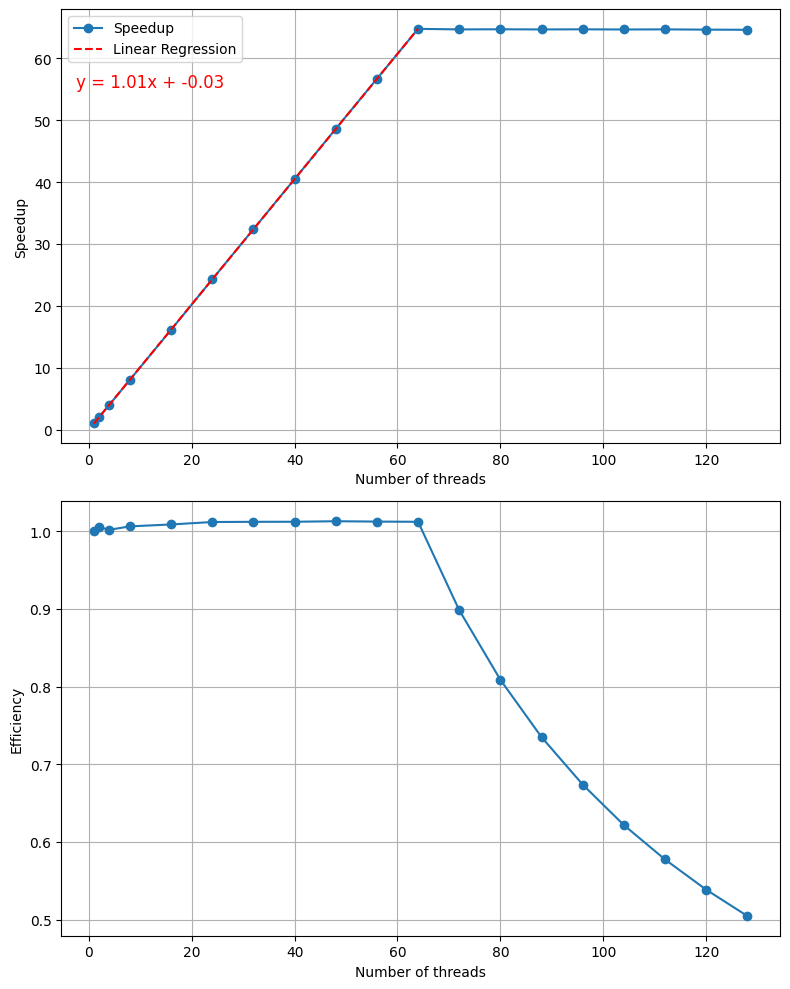

In [13]:
omp_strong_serial_time = omp_strong_mean_times['Elapsed Time(s)'].iloc[0]

fig, ax1 = plt.subplots(2, 1, figsize=(8, 10))

omp_strong_speedup = omp_strong_serial_time / omp_strong_mean_times['Elapsed Time(s)']
ax1[0].plot(omp_strong_mean_times.index, omp_strong_speedup, '-o', label='Speedup')
ax1[0].set_xlabel('Number of threads')
ax1[0].set_ylabel('Speedup')
ax1[0].grid()

x = omp_strong_mean_times.index[:11]
y = omp_strong_speedup[:11]
coefficients = np.polyfit(x, y, 1)
linear_model = np.poly1d(coefficients)

ax1[0].plot(x, linear_model(x), 'r--', label='Linear Regression')
slope, intercept = coefficients
ax1[0].text(0.02, 0.82, f'y = {slope:.2f}x + {intercept:.2f}', transform=ax1[0].transAxes, color='red', fontsize=12)
ax1[0].legend()
plt.tight_layout()

ax1[1].plot(omp_strong_mean_times.index, omp_strong_speedup / omp_strong_mean_times.index, '-o', label='Efficiency')
ax1[1].set_xlabel('Number of threads')
ax1[1].set_ylabel('Efficiency')
ax1[1].grid()

plt.tight_layout()
plt.savefig('figures/omp_strong_scaling_speedup_efficiency.png')
plt.show()

In [14]:
print(omp_strong_mean_times)
print(omp_strong_speedup)

         Iteration  Elapsed Time(s)
Threads                            
1              3.0       233.375300
2              3.0       116.089986
4              3.0        58.249208
8              3.0        28.997695
16             3.0        14.463119
24             3.0         9.612343
32             3.0         7.207400
40             3.0         5.765496
48             3.0         4.801381
56             3.0         4.117313
64             3.0         3.603581
72             3.0         3.608563
80             3.0         3.607399
88             3.0         3.608803
96             3.0         3.607747
104            3.0         3.609207
112            3.0         3.608246
120            3.0         3.610580
128            3.0         3.611960
Threads
1       1.000000
2       2.010297
4       4.006497
8       8.048064
16     16.135890
24     24.278711
32     32.379959
40     40.477923
48     48.605872
56     56.681454
64     64.762045
72     64.672638
80     64.693502
88     64.66834

## OpenMP Weak Scaling

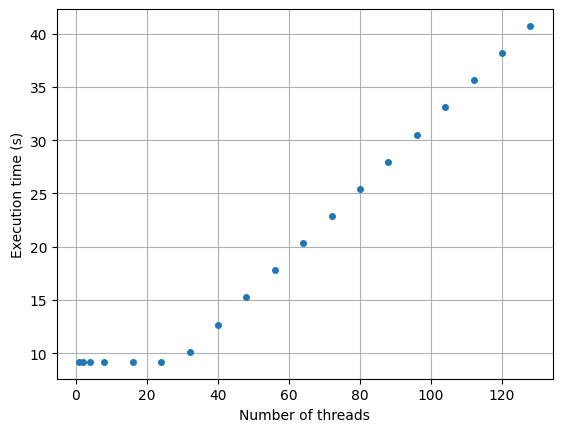

In [15]:
omp_weak_mean_times = omp_weak_times.groupby('Threads').mean()
omp_weak_std_times = omp_weak_times.groupby('Threads').std()

plt.errorbar(omp_weak_mean_times.index, omp_weak_mean_times['Elapsed Time(s)'], yerr=omp_weak_std_times['Elapsed Time(s)'], fmt='o', markersize=4)
plt.xlabel('Number of threads')
plt.ylabel('Execution time (s)')
#plt.ylim(0, None)
plt.grid()
plt.savefig('figures/omp_weak_scaling.png')
plt.show()

## Speedup and Efficiency of OpenMP Weak Scaling

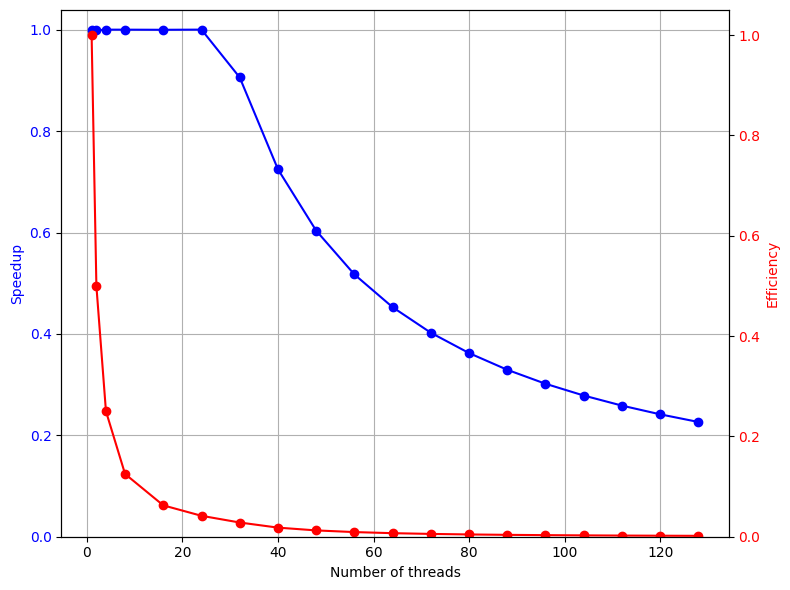

In [16]:
omp_weak_serial_time = omp_weak_mean_times['Elapsed Time(s)'].iloc[0]

fig, ax1 = plt.subplots(figsize=(8, 6))

speedup = omp_weak_serial_time / omp_weak_mean_times['Elapsed Time(s)']
ax1.plot(omp_weak_mean_times.index, speedup, '-o', color='b', label='Speedup')
ax1.set_xlabel('Number of threads')
ax1.set_ylabel('Speedup', color='b')
ax1.grid()
ax1.set_ylim(0, None)
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
efficiency = speedup / omp_weak_mean_times.index
ax2.plot(omp_weak_mean_times.index, efficiency, '-o', color='r', label='Efficiency')
ax2.set_ylabel('Efficiency', color='r')
ax2.set_ylim(0, None)
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.savefig('figures/omp_weak_scaling_speedup_efficiency.png')
plt.show()

## Hybrid scaling

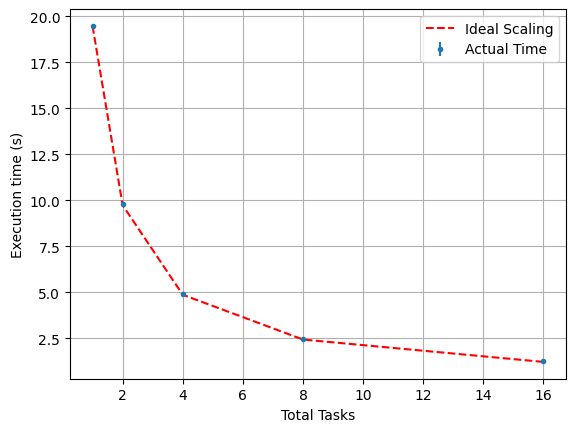

Total Threads
1     19.474136
2      9.782028
4      4.888396
8      2.454077
16     1.247494
Name: Computation Time(s), dtype: float64
Index([19.4741358, 9.7370679, 4.86853395, 2.434266975, 1.2171334875], dtype='float64', name='Total Threads')


In [17]:
hybrid_strong_times = pd.read_csv('hybrid_strong_scaling.csv')

hybrid_strong_times = hybrid_strong_times[hybrid_strong_times['Total Tasks'] == 8]

hybrid_strong_mean_times = hybrid_strong_times.groupby('Total Threads').mean()
hybrid_strong_std_times = hybrid_strong_times.groupby('Total Threads').std()

serial_time = hybrid_strong_mean_times['Computation Time(s)'].iloc[0]
ideal_time = serial_time / hybrid_strong_mean_times.index

plt.errorbar(hybrid_strong_mean_times.index, hybrid_strong_mean_times['Computation Time(s)'], yerr=hybrid_strong_std_times['Elapsed Time(s)'], fmt='o', markersize=3, label='Actual Time')
plt.plot(hybrid_strong_mean_times.index, ideal_time, '--', color='r', label='Ideal Scaling')

plt.xlabel('Total Tasks')
plt.ylabel('Execution time (s)')

plt.grid()
plt.legend()
plt.show()

print(hybrid_strong_mean_times['Computation Time(s)'])
print(ideal_time)

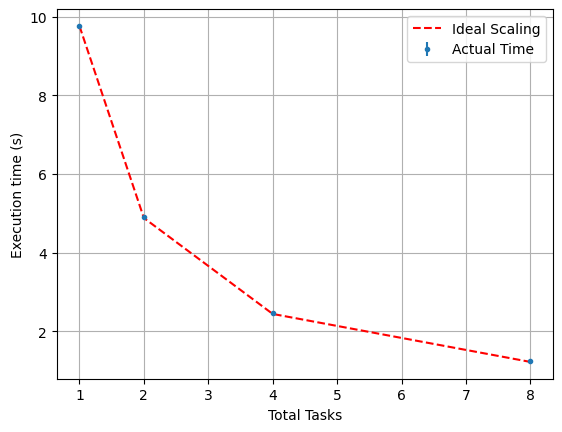

Total Tasks
1    9.758566
2    4.897754
4    2.468399
8    1.247494
Name: Computation Time(s), dtype: float64
Index([9.7585656, 4.8792828, 2.4396414, 1.2198207], dtype='float64', name='Total Tasks')


In [18]:
hybrid_strong_times = pd.read_csv('hybrid_strong_scaling.csv')

hybrid_strong_times = hybrid_strong_times[hybrid_strong_times['Total Threads'] == 16]

hybrid_strong_mean_times = hybrid_strong_times.groupby('Total Tasks').mean()
hybrid_strong_std_times = hybrid_strong_times.groupby('Total Tasks').std()

serial_time = hybrid_strong_mean_times['Computation Time(s)'].iloc[0]
ideal_time = serial_time / hybrid_strong_mean_times.index

plt.errorbar(hybrid_strong_mean_times.index, hybrid_strong_mean_times['Computation Time(s)'], yerr=hybrid_strong_std_times['Elapsed Time(s)'], fmt='o', markersize=3, label='Actual Time')
plt.plot(hybrid_strong_mean_times.index, ideal_time, '--', color='r', label='Ideal Scaling')

plt.xlabel('Total Tasks')
plt.ylabel('Execution time (s)')

plt.grid()
plt.legend()
plt.show()

print(hybrid_strong_mean_times['Computation Time(s)'])
print(ideal_time)

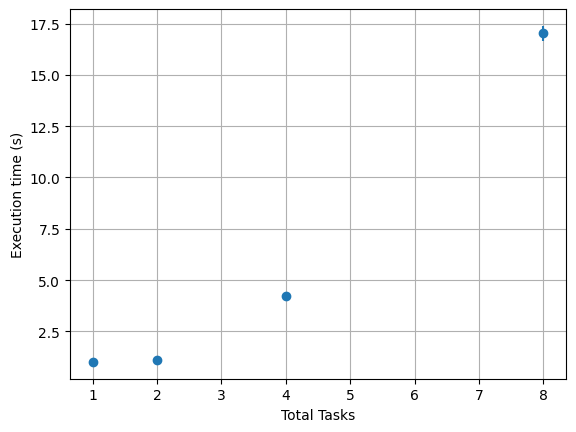

In [19]:
hybrid_weak_times = pd.read_csv('hybrid_weak_scaling.csv')

hybrid_weak_times = hybrid_weak_times[hybrid_weak_times['Total Threads'] == 16]

hybrid_weak_mean_times = hybrid_weak_times.groupby('Total Tasks').mean()
hybrid_weak_std_times = hybrid_weak_times.groupby('Total Tasks').std()

plt.errorbar(hybrid_weak_mean_times.index, hybrid_weak_mean_times['Elapsed Time(s)'], yerr=hybrid_weak_std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Total Tasks')
plt.ylabel('Execution time (s)')
plt.grid()
plt.show()

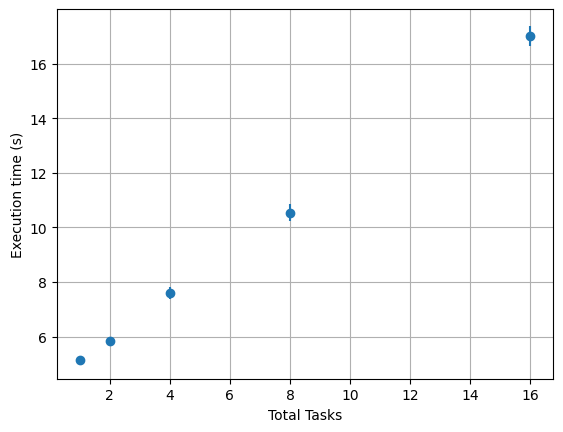

In [20]:
hybrid_weak_times = pd.read_csv('hybrid_weak_scaling.csv')

hybrid_weak_times = hybrid_weak_times[hybrid_weak_times['Total Tasks'] == 8]

hybrid_weak_mean_times = hybrid_weak_times.groupby('Total Threads').mean()
hybrid_weak_std_times = hybrid_weak_times.groupby('Total Threads').std()

plt.errorbar(hybrid_weak_mean_times.index, hybrid_weak_mean_times['Elapsed Time(s)'], yerr=hybrid_weak_std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Total Tasks')
plt.ylabel('Execution time (s)')
plt.grid()
plt.show()